In [1]:
# Import packages
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scarlet

import kuaizi as kz
from kuaizi.display import display_single, display_rgb, SEG_CMAP
from kuaizi.detection import Data
from kuaizi.utils import padding_PSF

import unagi

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column, vstack
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy.convolution import convolve, Gaussian2DKernel

In [4]:
from kuaizi.fit import ScarletFitter, fitting_obs_tigress

In [5]:
env_dict = {'project': 'HSC', 'name': 'LSBG', 'data_dir': '/scratch/gpfs/jiaxuanl/Data'}
kz.utils.set_env(**env_dict)
kz.utils.set_matplotlib(style='default', usetex=False)

In [40]:
lsbg_cat = Table.read('/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Catalog/candy/candy_cutout_cat_candy.fits')
print('# of LSBGs:', len(lsbg_cat))

# of LSBGs: 781


In [18]:
lsbg = lsbg_cat[5] # 12 # 69

In [19]:
lsbg['viz-id']

6

In [20]:
prefix = 'LSBG'
channels = 'griz'
index = lsbg['viz-id']

bright = (lsbg['mag_auto_i'] < 17.5)
print('Bright =', bright)

lsbg_coord = SkyCoord(ra=lsbg['ra'], dec=lsbg['dec'], unit='deg')
cutout = [fits.open(f"{lsbg['prefix']}_{band}.fits") for band in channels]
psf_list = [fits.open(f"{lsbg['prefix']}_{band}_psf.fits") for band in channels]

images = np.array([hdu[1].data for hdu in cutout])
# note: all bands share the same WCS here, but not necessarily true.
w = wcs.WCS(cutout[0][1].header)
weights = 1.0 / np.array([hdu[3].data for hdu in cutout])
weights[np.isinf(weights)] = 0.0
psf_pad = padding_PSF(psf_list)  # Padding PSF cutouts from HSC
psfs = scarlet.ImagePSF(np.array(psf_pad))
# saturation mask and interpolation mask from HSC S18A
sat_mask = np.array([sum(unagi.mask.Mask(
    hdu[2].data, data_release='s18a').extract(['INTRP', 'SAT'])) for hdu in cutout])
data = Data(images=images, weights=weights, masks=sat_mask,
            wcs=w, psfs=psfs, channels=channels)

Bright = False


### Running scarlet spergel modeling for `/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Cutout/candy/candy_6`
    Working directory: /scratch/gpfs/jiaxuanl/Data/HSC/LSBG
  - Detect sources and make mask
    Query GAIA stars...
    Taking Gaia catalogs stored in `Tigress`
    4 stars from Gaia are masked!
    Detected 149 objects
    4 stars from Gaia are masked!
    Detected 116 objects
    Detected 61 objects
  - Added Spergel profile with bbox = (4, 166, 166)
    Added constant sky background
    Total number of sources: 11
  - Optimizing scarlet model...
    Optimizaiton: Succeed for e_rel = 0.0001 with 98 iterations! Try higher accuracy!
    Optimizaiton: Succeed for e_rel = 0.0005 with 178 iterations! Try higher accuracy!
    Optimizaiton: Succeed for e_rel = 0.0002 with 258 iterations! Try higher accuracy!
  - After 258 iterations, logL = 1051399.11
    Elapsed time for fitting: 102.01 s
  - Components [0] are considered as the target galaxy.
  - Masking stars and other sources that are m

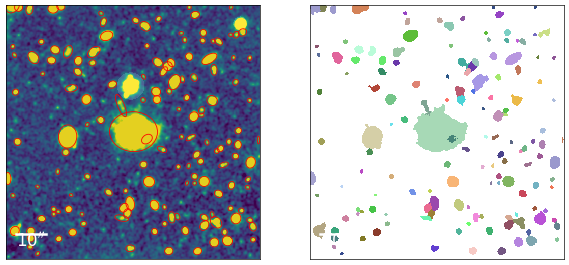

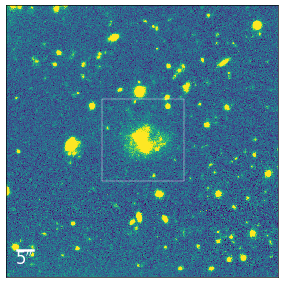

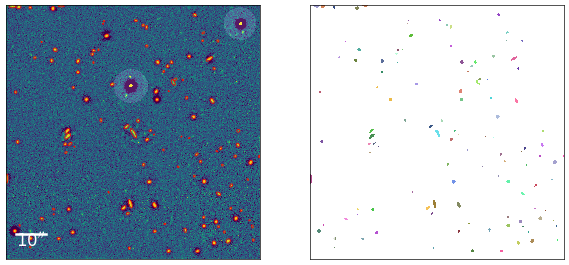

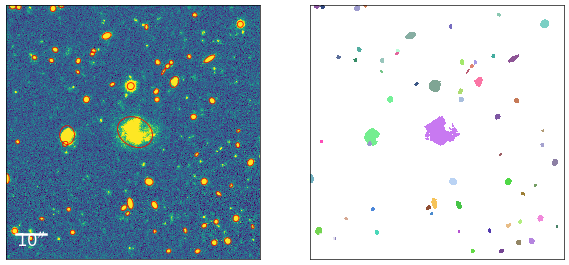

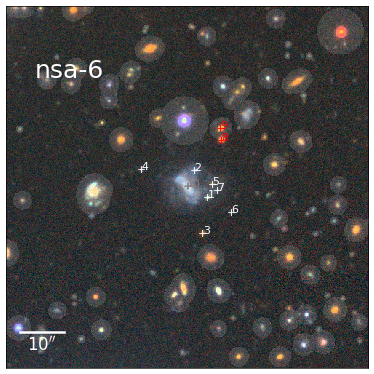

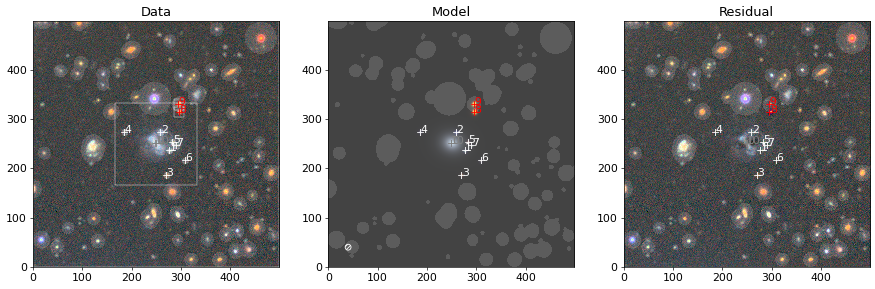

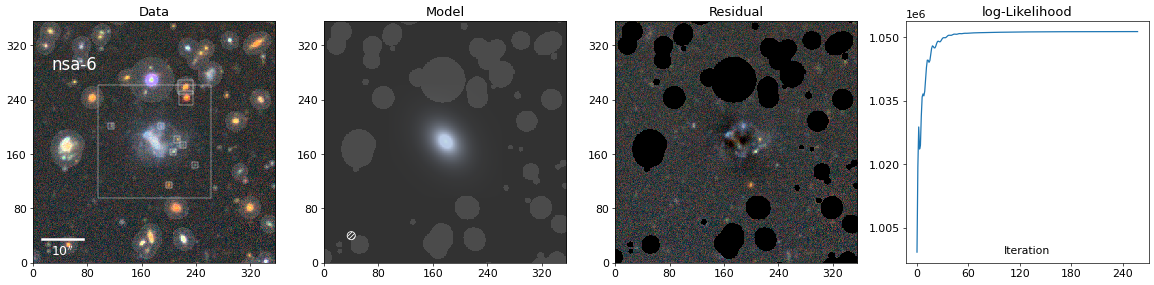

In [21]:
fitting_obs_tigress(env_dict, 
                    lsbg, 
                    name='viz-id',
                    method='spergel', 
                    min_grad=-0.1,
#                     starlet_thresh=0.3,
#                     monotonic=True,
                    bkg=True,
#                     variance=0.015**2,
#                     scales=[0, 1, 2, 3, 4],
                    prefix='candy', 
                    log_dir='./log/candy/', 
                    figure_dir='./Figure/candy/',
                    model_dir='./Model/candy/spergel/',
                    show_figure=True)

In [43]:
fitter = ScarletFitter(method='wavelet', tigress=True, bright=bright,
                       starlet_thresh=0.3, min_grad=-0.2,
                       monotonic=True, bkg=True,
                       variance=0.015**2, 
                       scales=[0, 1, 2, 3, 4],
                       prefix='candy', 
                       log_dir='./log/candy/', 
                       figure_dir='./Figure/candy/',
                       model_dir='./Model/candy/spergel/',
                       index=lsbg['viz-id'], 
                       show_figure=True)
fitter.load_data(data, lsbg_coord)

# fitter = ScarletFitter(method='spergel', tigress=True, bright=bright,
#                        starlet_thresh=0.5, min_grad=0., bkg=True,
# #                        monotonic=True, 
# #                        variance=0.015**2, 
# #                        scales=[0, 1, 2, 3, 4],
#                        prefix='candy', 
#                        log_dir='./log/candy/', 
#                        figure_dir='./Figure/candy/',
#                        model_dir='./Model/candy/spergel/',
#                        index=lsbg['viz-id'], 
#                        show_figure=True)
# fitter.load_data(data, lsbg_coord)

  - Detect sources and make mask
    Query GAIA stars...
    Taking Gaia catalogs stored in `Tigress`
    4 stars from Gaia are masked!
    Detected 149 objects
    4 stars from Gaia are masked!
    Detected 116 objects
    Detected 61 objects
  - Wavelet modeling with the following hyperparameters:
    min_grad = -0.20, starlet_thresh = 0.30 (contam_ratio = 0.11), 
     monotonic = True, variance = 0.00022, scales = [0, 1, 2, 3, 4].
    Added constant sky background
    Total number of sources: 10
  - Optimizing scarlet model...
    Optimizaiton: Succeed for e_rel = 0.0001 with 130 iterations! Try higher accuracy!
    Optimizaiton: Succeed for e_rel = 0.0005 with 175 iterations! Try higher accuracy!
    Optimizaiton: Succeed for e_rel = 0.0002 with 234 iterations! Try higher accuracy!
  - After 214 iterations, logL = 1056865.17
    Elapsed time for fitting: 167.88 s
  - Components [0] are considered as the target galaxy.
  - Masking stars and other sources that are modeled, to deal wi

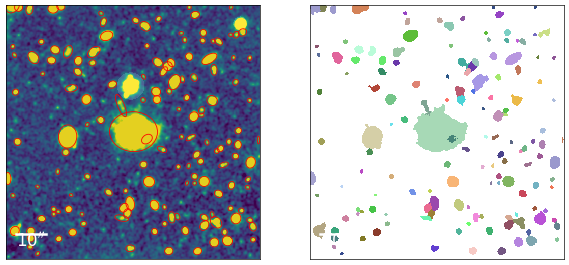

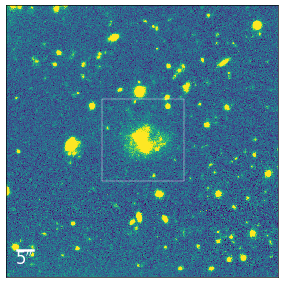

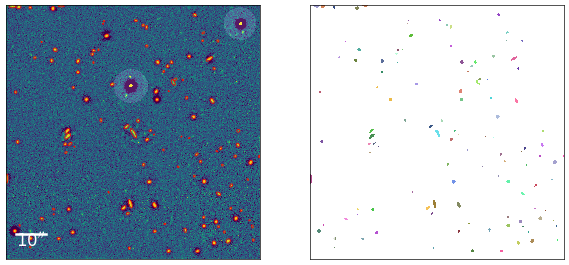

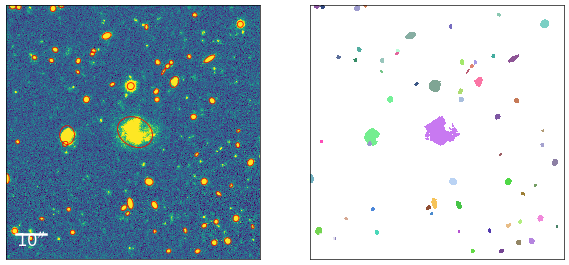

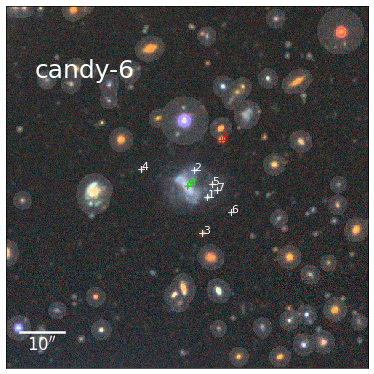

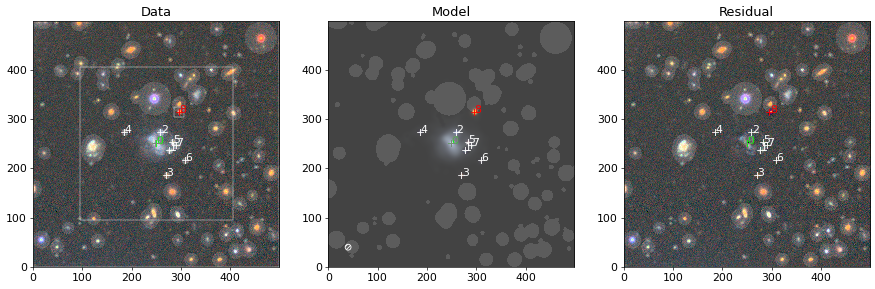

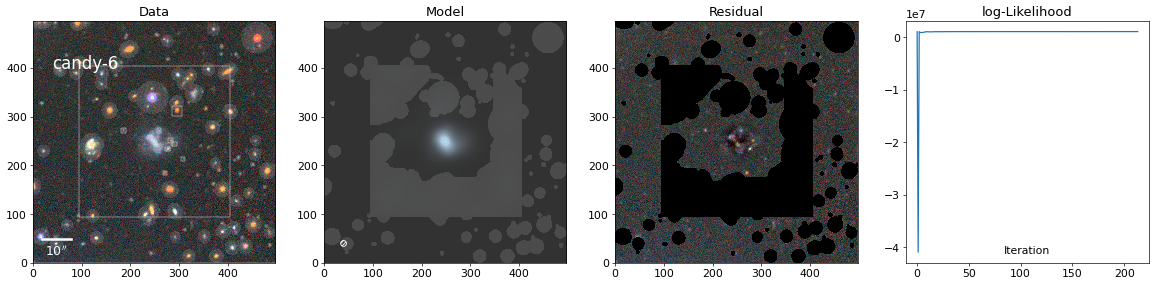

In [44]:
fitter.fit()

#### Step-by-step

In [22]:
fitter._first_gaia_search()

    Query GAIA stars...
    Taking Gaia catalogs stored in `Tigress`
    4 stars from Gaia are masked!


In [23]:
# Set the weights of saturated star centers to zero
# In order to make the box size estimation more accurate.
temp = np.copy(fitter.data.masks)
for i in range(len(fitter.data.channels)):
    temp[i][~fitter.msk_star_ori.astype(bool)] = 0
    fitter.data.weights[i][temp[i].astype(bool)] = 0.0

    Detected 98 objects


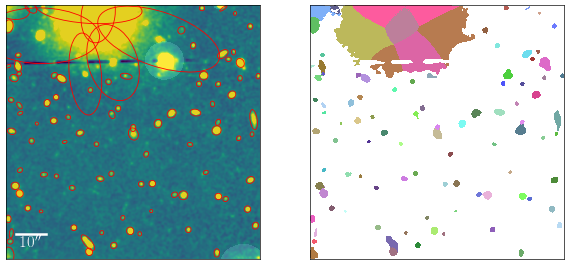

In [24]:
# Replace the vanilla detection with a convolved vanilla detection
first_dblend_cont = 0.07 if max(
    fitter.data.images.shape) * fitter.pixel_scale > 200 else 0.002

if fitter.method == 'wavelet':
    first_dblend_cont = 0.07 if max(
    fitter.data.images.shape) * fitter.pixel_scale > 200 else 0.002
        
fitter._first_detection(first_dblend_cont, conv_radius=2, lvl=4)

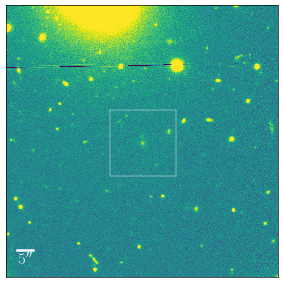

In [25]:
fitter._estimate_box(fitter.cen_obj)

In [26]:
fitter._mask_stars_outside_box()

    4 stars from Gaia are masked!


    Detected 84 objects


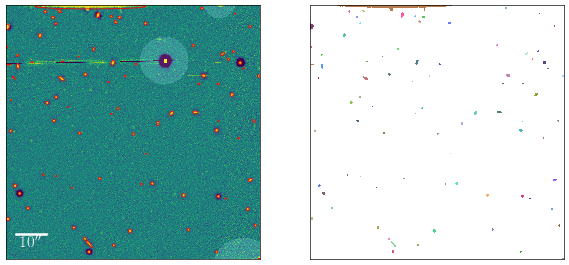

In [27]:
fitter._cpct_obj_detection()

In [28]:
from kuaizi.display import draw_circles

    Detected 45 objects


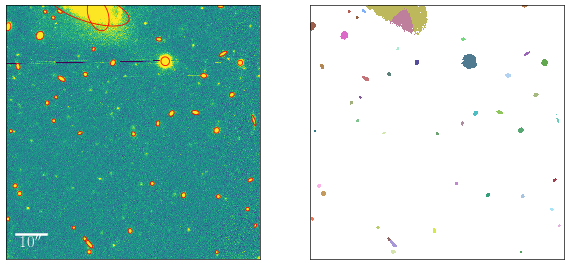

In [29]:
fitter._big_obj_detection()

In [30]:
fitter._merge_catalogs()

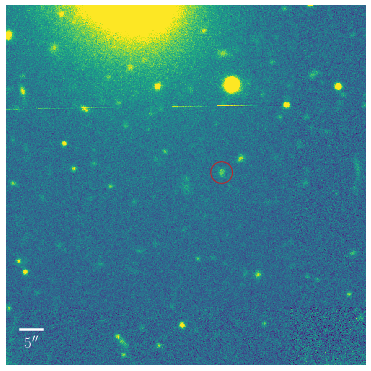

In [31]:
draw_circles(fitter.data.images[0], fitter.obj_cat_big)

In [32]:
fitter._construct_obs_frames()

In [33]:
src = fitter.cen_obj

In [53]:
fitter._add_central_source(min_grad=fitter.min_grad, thresh=0.1)
fitter._add_other_sources(min_grad=0.1, thresh=0.1)

  - Added Spergel profile with bbox = (4, 150, 150)
    Added constant sky background
    Total number of sources: 6


[<AxesSubplot:title={'center':'Data'}>,
 <AxesSubplot:title={'center':'Model'}>,
 <AxesSubplot:title={'center':'Residual'}>]

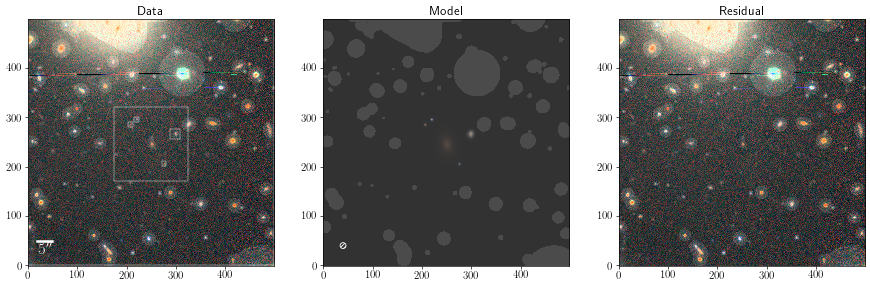

In [35]:
kz.display.display_scarlet_model(
    fitter.blend,
#     show_ind=[0],
    #zoomin_size=50,
    minimum=-0.2,
    stretch=0.9,
    add_boxes=True,
    channels='griz',
    show_mask=False,
    show_mark=False, 
    show_loss=False)

  - Optimizing scarlet model...
    Optimizaiton: Succeed for e_rel = 0.0001 with 186 iterations! Try higher accuracy!
    Optimizaiton: Succeed for e_rel = 0.0005 with 266 iterations! Try higher accuracy!
    Optimizaiton: Succeed for e_rel = 0.0002 with 346 iterations! Try higher accuracy!
  - After 346 iterations, logL = 210382.09
    Elapsed time for fitting: 110.68 s


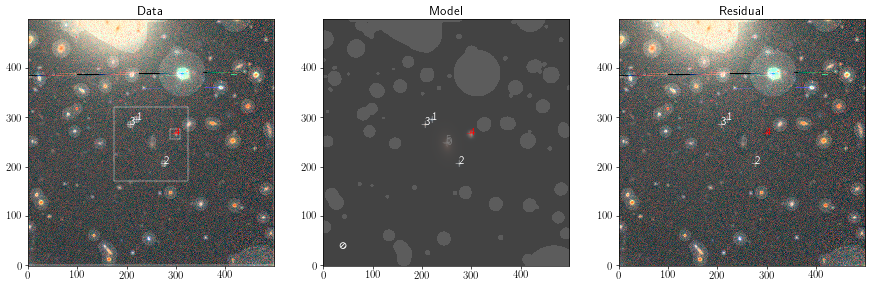

In [36]:
fitter._optimize()

In [48]:
fitter.blend.sources[0].get_model().sum(axis=(1, 2))

Parameter([6.46851968e-17, 6.46851968e-17, 6.46851968e-17, 6.46851968e-17])

  - Components [0] are considered as the target galaxy.
  - Masking stars and other sources that are modeled, to deal with leaky flux issue.
  - Saving the results as /scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Model/nsa_z002_004/spergel/mock-90766-trained-model-spergel.df


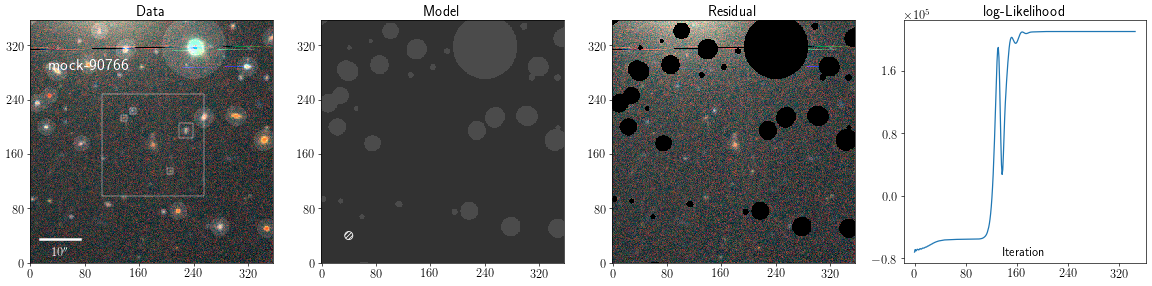

In [52]:
try:
    fitter._find_sed_ind()
    fitter._gen_final_mask()
    fitter._display_results()
except:
    pass

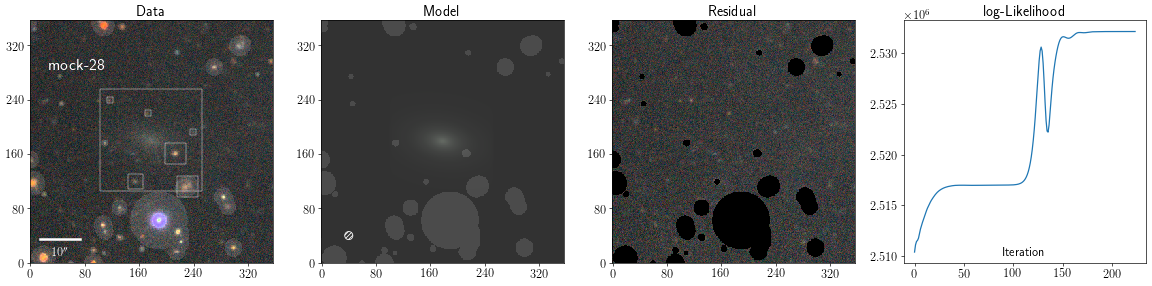

In [37]:
fitter._display_results()

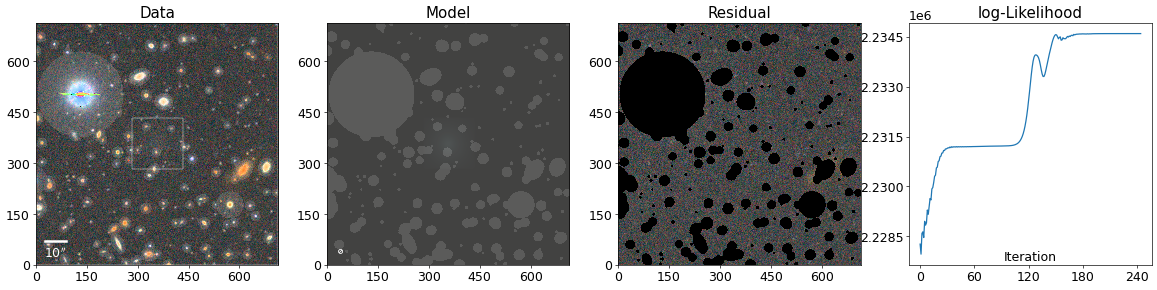

In [239]:
fig = kz.display.display_scarlet_results_tigress(
        fitter._blend,
        fitter.final_mask,
#         show_ind=fitter.sed_ind,
#         zoomin_size=50,
        minimum=-0.2,
        stretch=0.7,
        Q=1,
        channels=fitter.data.channels,
        show_loss=True,
        show_mask=False,
        show_mark=False,
        scale_bar=True)

In [240]:
from kuaizi.measure import cal_cnu
david = fitter.blend.sources[0]
print(david.get_parameter(3) * 0.168)
sed, morph = david.get_models_of_children()
true_flux = (2 * np.pi * david.parameters[3]**2) / cal_cnu(david.parameters[2])**2
print('mag:', -2.5 * np.log10(true_flux * sed) + 27.0)
print('Sky:', -2.5 * np.log10(fitter.blend.sources[-1].get_model().mean(axis=(1, 2)) / 0.168**2) + 27)

[[9.78091718]]
mag: [[20.95255956 20.47541381 20.3080208  20.54341934]]
Sky: [30.39239143 29.73059861 28.67050248 28.82035989]


[<AxesSubplot:title={'center':'Background'}>,
 <AxesSubplot:title={'center':'Mock Image'}>,
 <AxesSubplot:title={'center':'Model'}>]

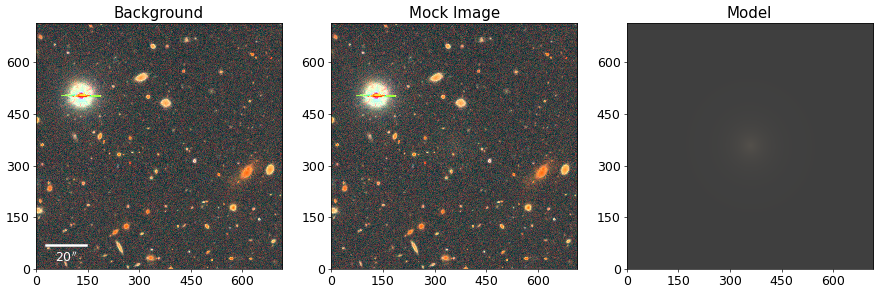

In [241]:
import pickle

with open(f'./Cutout/mock_sample/mock_{lsbg["viz-id"]}.pkl', 'rb') as fp:
    gal = pickle.load(fp)
gal.display(stretch=0.8)

In [244]:
gal.model.info

{'comp': [{'model': galsim.sersic.Sersic,
   'model_params': {'n': 0.9633822325633931,
    'half_light_radius': 12.097237240417355},
   'shear_params': {'q': 0.956260928877007,
    'beta': coord.Angle(-1.2817051303891247, coord.radians)},
   'sed': array([0.5723978 , 0.83970861, 1.        , 1.16199369])}],
 'imag': 19.8831568836033,
 'flux_fraction': [1.0],
 'ra': 346.1801183805011,
 'dec': 0.9159681129547782,
 'gmag': 20.4889119964195,
 'rmag': 20.072835367354816,
 'zmag': 19.720147458149533}

In [51]:
from PIL import Image

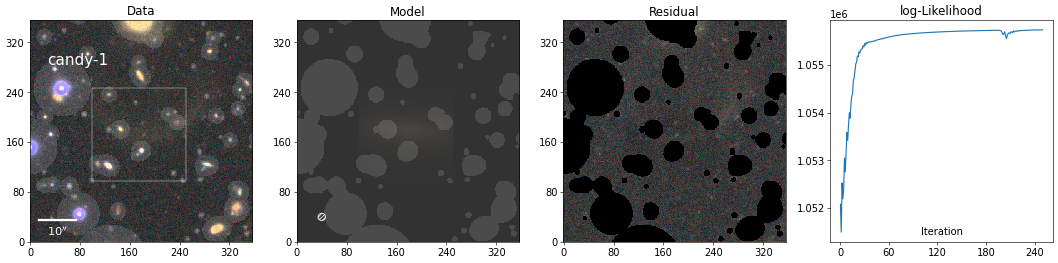

In [53]:
Image.open('./Figure/candy/spergel/candy-1-zoomin-spergel.png')

In [27]:
from kuaizi.measure import makeMeasurement, makeMeasurementMockGal

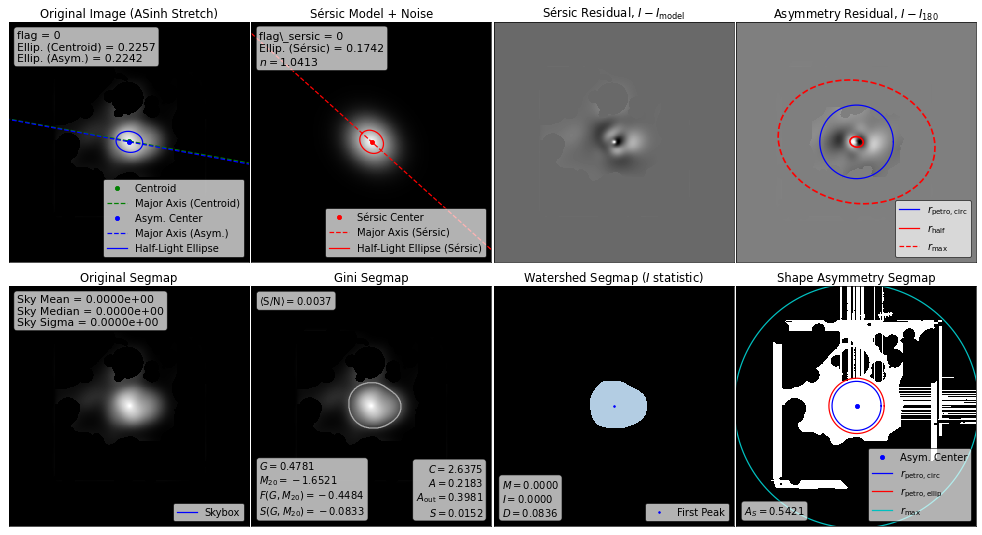

In [46]:
measurement, t = makeMeasurement(list(np.array(fitter.blend.sources)[fitter.sed_ind]),
                                 fitter.blend.observations[0],
                                 aggr_mask=fitter.final_mask.astype(bool),
                                 makesegmap=False, sigma=0.02,
                                 method='spergel',
                                 zeropoint=27.0, out_prefix=None,
                                 show_fig=True, asinh_a=0.02, framealpha=0.7)
#row = _write_to_row(row, measurement)

In [47]:
# Sky SB
-2.5 * np.log10(fitter.blend.sources[-1].get_model().mean(axis=(1, 2)) / 0.168**2) + 27

Parameter([76.1652695 , 76.01515255, 75.59113864, 75.97129666])

In [49]:
27 - 2.5 * np.log10(measurement['flux'])

array([19.360765, 19.044504, 18.880737, 18.988934], dtype=float32)

In [48]:
print(measurement['rhalf_circularized'] * 0.168)
print(measurement['rhalf_spergel'] * 0.168)

4.131823049446156
nan


In [35]:
measurement['SB_eff_avg']

array([24.55643447, 24.29442425, 24.09907004, 24.07489656])

In [33]:
lsbg

<Row index=5>
  UV   viz-id     ra      dec        iSB          e_iSB     mag_auto_i  e_imag   g-r     g-i     Reff   e_Reff    n      e_n     Ell    e_Ell     Ag      Ar      Ai   recno flux_radius_ave_i cutout_size                           prefix                              RA      DEC    radius image_flag [5] psf_flag [5]
                                mag / arcsec2 mag / arcsec2    mag       mag     mag     mag    arcsec  arcsec                                   mag     mag     mag               arcsec                                                                                               arcmin                            
bytes1 int16   float64  float64    float64       float64     float64   float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 int32      float64        float64                            bytes59                           float64  float64 float64      bool          bool    
------ ------ --------- ------- ------------- ------------- ---------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ----- ----------------- ----------- --------------------------------------------------------- --------- ------- ------- -------------- ------------
            6 244.48318 44.2905         22.71           0.4      19.31    0.24    0.25    0.43    4.12    0.79    1.11    0.31    0.27    0.03   0.037   0.026   0.019     6              4.12         0.7 /scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Cutout/candy/candy_6 244.48318 44.2905     0.7   True .. True True .. True

In [104]:
print(measurement['rhalf_circularized'] * 0.168)
print(gal.model.info['comp'][0]['model_params']['half_light_radius'])
measurement['sersic_rhalf'] * 0.168 * np.sqrt(1 - measurement['ellipticity_asymmetry'])

4.914961939897793
4.556496604388463


5.068036433903733

In [105]:
measurement['SB_eff_avg'], measurement['mag']

(array([25.790022, 25.45826 , 25.405367, 25.216639], dtype=float32),
 array([20.323706, 19.991943, 19.93905 , 19.75032 ], dtype=float32))

In [106]:
-2.5 * np.log10(measurement['flux_circ']) + 27

array([20.344858, 20.013096, 19.960203, 19.771473], dtype=float32)

In [107]:
gal.model.info['gmag'], gal.model.info['rmag'], gal.model.info['imag']

(20.420431085096865, 20.089120531929915, 19.987150741690147)

In [108]:
measurement['ellipticity_asymmetry'], 1 - gal.model.info['comp'][0]['shear_params']['q']

(0.12251074353348768, 0.1277100516230144)